In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2,l1

In [2]:
df=pd.read_csv('diabetes-3.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit(xtest)

In [8]:
model=Sequential([
    Dense(64,input_shape=(xtrain.shape[1],),activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [9]:
historyn=model.fit(xtrain,ytrain,epochs=10,batch_size=12,validation_split=0.2)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2238 - mse: 0.2238 - val_loss: 0.1938 - val_mse: 0.1938
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1687 - mse: 0.1687 - val_loss: 0.1695 - val_mse: 0.1695
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1609 - mse: 0.1609 - val_loss: 0.1628 - val_mse: 0.1628
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1518 - mse: 0.1518 - val_loss: 0.1613 - val_mse: 0.1613
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1322 - mse: 0.1322 - val_loss: 0.1554 - val_mse: 0.1554
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1364 - mse: 0.1364 - val_loss: 0.1569 - val_mse: 0.1569
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1260 - mse: 0.1260 - val_loss: 0.1566 - val_mse: 0.1566
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1352 - mse: 0.1352 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1398 - mse:

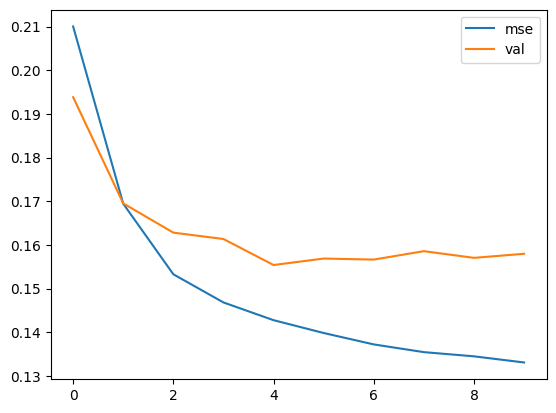

In [10]:
plt.plot(historyn.history['mse'],label='mse')
plt.plot(historyn.history['val_mse'],label='val')
plt.legend()
plt.show()

In [12]:
modelr=Sequential([
    Dense(256,input_shape=(xtrain.shape[1],),activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dense(256,activation='relu',kernel_regularizer=l1(0.02)),
    Dense(1,activation='sigmoid')
])
modelr.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [13]:
historyr=modelr.fit(xtrain,ytrain,epochs=10,batch_size=12,validation_split=0.2)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 19.4484 - mse: 0.2193 - val_loss: 11.2190 - val_mse: 0.1964
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0963 - mse: 0.1846 - val_loss: 3.9013 - val_mse: 0.1872
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7628 - mse: 0.1698 - val_loss: 0.5917 - val_mse: 0.1989
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4220 - mse: 0.1964 - val_loss: 0.2855 - val_mse: 0.2189
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2692 - mse: 0.2017 - val_loss: 0.2790 - val_mse: 0.2027
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2667 - mse: 0.1925 - val_loss: 0.2676 - val_mse: 0.1850
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2437 - mse: 0.1692 - val_loss: 0.2541 - val_mse: 0.1825
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2391 - mse: 0.1673 - val_loss: 0.2312 - val_mse: 0.1703
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2171 - ms

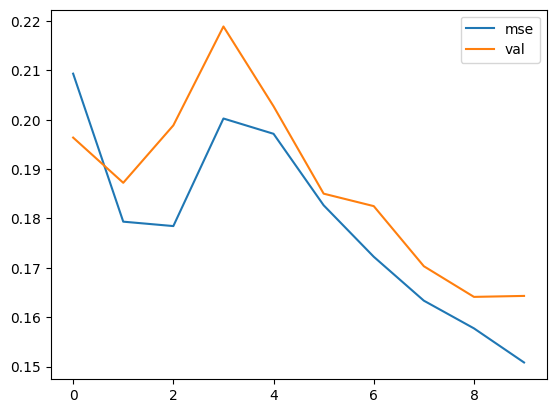

In [14]:
plt.plot(historyr.history['mse'],label='mse')
plt.plot(historyr.history['val_mse'],label='val')
plt.legend()
plt.show()